In [1]:
#Load libaries
import os
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from pydotplus import graph_from_dot_data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC 
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Load datasets
#ex_data =  pd.read_csv('sayad_dataset.csv')
data = pd.read_csv('CA_Wildfires.csv')                      # First build dataset on all CA
#data = pd.read_csv('CA_Wildfires_by_county.csv')           # Data on 44 counties
#data = pd.read_csv('CA_Wildfires_fire_seasonV2.csv')
#data = pd.read_csv('CA_Wildfires_4_Counties_June-Oct.csv')
#data = pd.read_csv('CA_Wildfires2020.txt')

In [2]:
data.head()

,NDVI,LST,TA,Class
0,0.241233,280.170902,5.0,No_fire
1,0.242536,281.678667,5.0,No_fire
2,0.243840,285.865983,5.0,No_fire
3,0.245143,283.249994,5.0,No_fire
4,0.246446,275.546052,4.0,No_fire


In [3]:
data["Class"].replace({"Fire": 1, "No_fire": 0}, inplace=True)
data = data[['NDVI','LST','TA','Class']]

In [4]:
data

,NDVI,LST,TA,Class
0,0.241233,280.170902,5.0,0
1,0.242536,281.678667,5.0,0
2,0.243840,285.865983,5.0,0
3,0.245143,283.249994,5.0,0
4,0.246446,275.546052,4.0,0
...,...,...,...,...
726,0.323556,285.095924,5.0,0
727,0.322612,279.868729,8.0,0
728,0.321667,281.404568,5.0,0
729,0.320723,284.108339,5.0,0


In [5]:
Count=data.Class.value_counts() #count target feature 
Count

0    439
1    292
Name: Class, dtype: int64

In [6]:
print('Proportion:', round(Count[0] / Count[1], 2), ': 1')


Proportion: 1.5 : 1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NDVI    731 non-null    float64
 1   LST     731 non-null    float64
 2   TA      731 non-null    float64
 3   Class   731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


In [8]:
data.describe() # Statistic summary

,NDVI,LST,TA,Class
count,731.000000,731.000000,731.000000,731.000000
mean,0.346921,299.274804,6.214774,0.399453
std,0.070728,10.908013,1.818203,0.490121
min,0.211590,269.997587,4.000000,0.000000
25%,0.286646,289.686953,5.000000,0.000000
50%,0.338579,300.684537,5.000000,0.000000
75%,0.399905,308.593247,9.000000,1.000000
max,0.588486,318.525754,9.000000,1.000000


In [9]:
data.isnull().sum() # return number of missing value for each column

NDVI     0
LST      0
TA       0
Class    0
dtype: int64

In [10]:
#data = data.fillna(data.mean()) #Fill 13 missing values in NDVI with average NDVI
#data = data.dropna() #drop all rows contain NaN

In [11]:
data.drop(columns='Class').skew(axis = 0) # return skewness of each independent feature

NDVI    0.483825
LST    -0.225125
TA      0.759359
dtype: float64

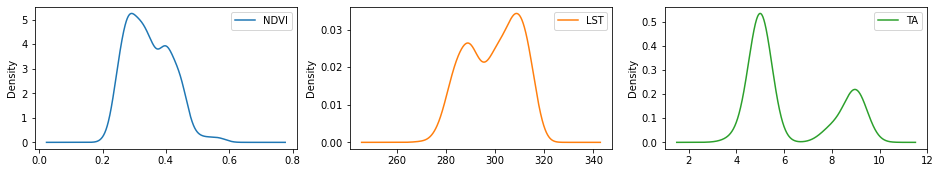

In [12]:
# Density
data.drop(columns='Class').plot(kind='density', subplots=True, layout=(4,3),figsize=(16, 12), sharex=False)
plt.show()

In [13]:

data.corr() #return correlation between columns

,NDVI,LST,TA,Class
NDVI,1.000000,-0.172510,0.159178,0.034254
LST,-0.172510,1.000000,0.391007,0.563516
TA,0.159178,0.391007,1.000000,0.484658
Class,0.034254,0.563516,0.484658,1.000000


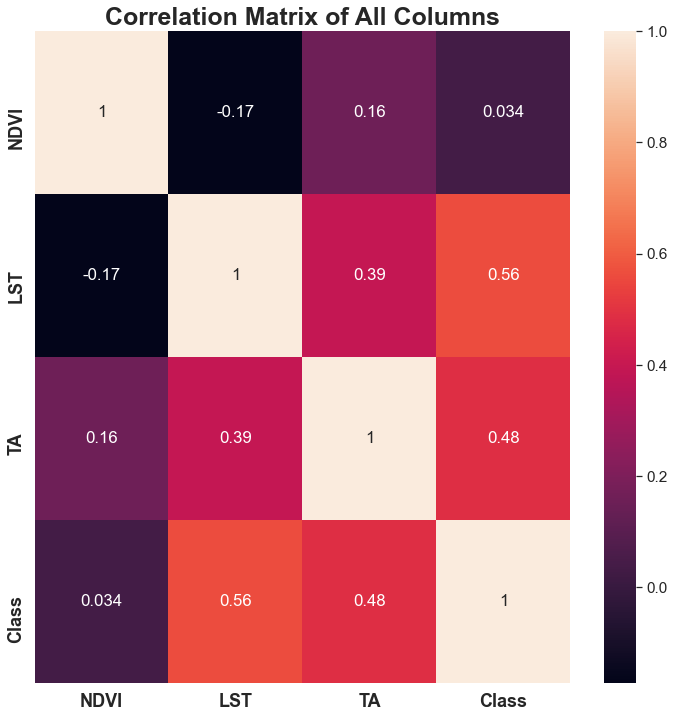

In [14]:
#Correlation matrix
plt.figure(figsize=(12, 12))
corr = data.corr()
sns.set(font_scale=1.4)
res=sns.heatmap(corr, annot=True)
res.set_title("Correlation Matrix of All Columns",fontsize=25,fontweight='bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18,fontweight='bold')
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 18,fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/CorrMatrix',dpi=300) #, transparent=True)
plt.show()

In [15]:
data.Class.value_counts() #count target feature 

0    439
1    292
Name: Class, dtype: int64

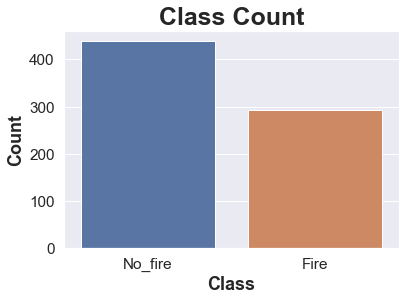

In [16]:
data["Class"].replace({1:"Fire", 0:"No_fire"}, inplace=True)
#count plot of target feature
classCount= sns.countplot(x='Class', data = data)
classCount.axes.set_title("Class Count",fontsize=25,fontweight='bold')
classCount.set_xlabel("Class",fontsize=18,fontweight='bold')
classCount.set_ylabel("Count",fontsize=18,fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/ClassCount',dpi=300,bbox_inches='tight')
plt.show()

In [17]:
data["Class"].replace({"Fire": 1, "No_fire": 0}, inplace=True)

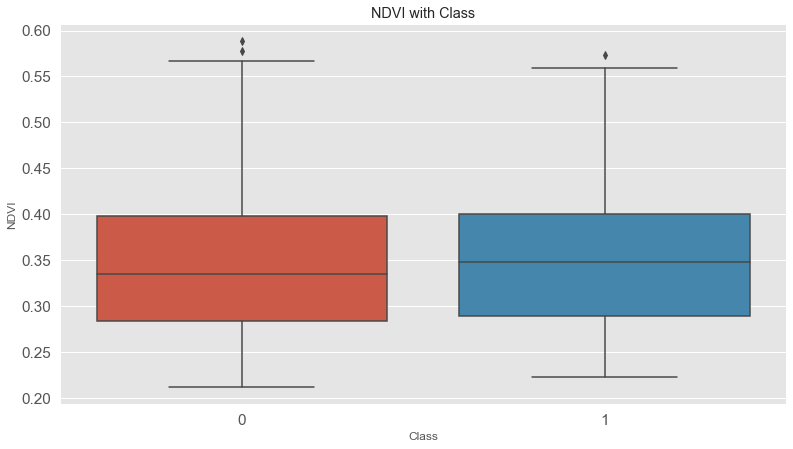

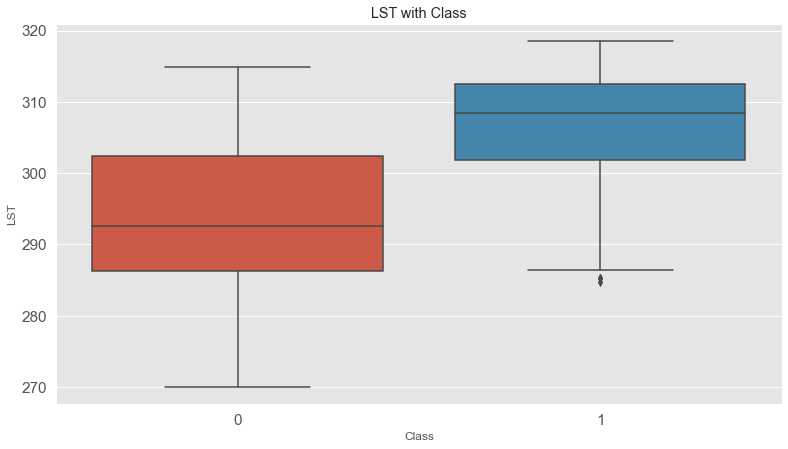

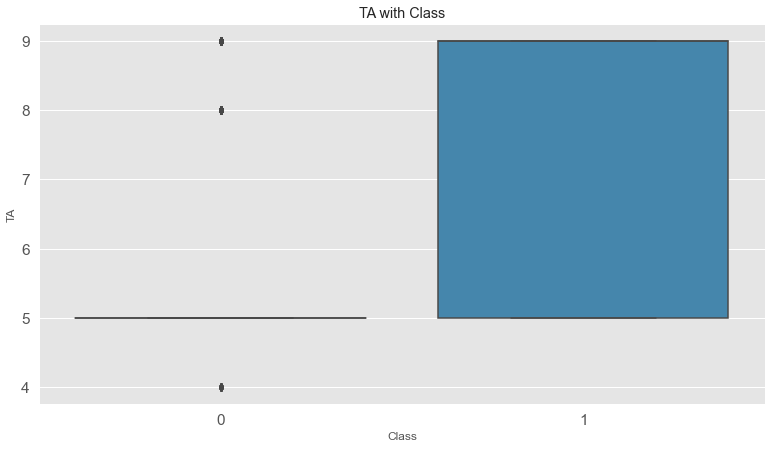

In [18]:
# Visualiztion of outliers data
column_names = ['NDVI', 'LST', 'TA']
#Boxplot
train = data[column_names]
plt.style.use('ggplot')
for i in column_names:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Class'))
    sns.boxplot(x=data.Class, y=train[i])
    plt.show()

In [19]:
# finding outliers using zscore
#z = np.abs(stats.zscore(data))
#z  # print outliers

In [20]:
#data.shape

In [21]:
#np.count_nonzero(np.where( z > 3)) # count number of outliers

In [22]:
#data_outlier_z = data[(z <= 3).all(axis=1)] #dropped outliers
#data_outlier_z.shape     #shape after removed outliers

In [23]:
# Histograms
#data_outlier_z.drop(columns=['Class']).hist(bins=20, figsize=(15,15),color='b'); 

In [24]:
#scaler = StandardScaler() # Normalize data using z-score normalizer
#data_normalize = scaler.fit_transform(data) #.drop(columns=['Class']))
#data_normalize_df = pd.DataFrame(data_normalize,columns=['NDVI','LST','TA','Class'])

In [25]:
#data_normalize_df.hist(bins=20, figsize=(15,15),color='b'); # After normalied data

# Applying models and evalution

In [26]:
#X = data_outlier_z[['NDVI','LST','TA']]
#Y = data_outlier_z['Class']
#X = data_normalize_df.drop(columns=['Class'])
#Y = data_normalize_df['Class']

X= data.drop(columns=['Class']).values
Y = data['Class'].values

#X = preprocessing.scale(X)


# 20% test 80% training data             
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 0)


# Logistic Regression

In [27]:
# Instantiate
#logit_model = LogisticRegression()
logit_model = LogisticRegression()#(C=100, class_weight= {1: 0.7, 0: 0.3}, penalty= 'l2', solver= 'liblinear')
# Fit
logit_model = logit_model.fit(X_train, y_train)
logit_model.score(X_train,y_train)

# Predictions on the test dataset
LR_pred = pd.DataFrame(logit_model.predict(X_test))

# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(X_test))

print(metrics.classification_report(y_test, LR_pred))   #Logistic Regression 


              precision    recall  f1-score   support

           0       0.83      0.90      0.86        81
           1       0.86      0.77      0.82        66

    accuracy                           0.84       147
   macro avg       0.85      0.84      0.84       147
weighted avg       0.85      0.84      0.84       147



Text(0.5, 8.5, 'Predicted label')

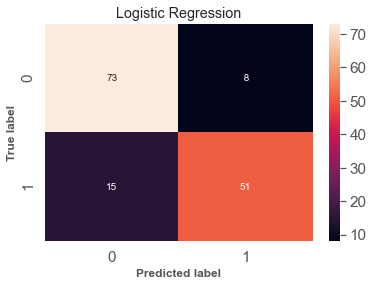

In [28]:
LR_cm = confusion_matrix(y_test, LR_pred)
sns.heatmap(LR_cm,annot=True,fmt='2.0f')
plt.title('Logistic Regression')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')

In [29]:
# Should we be excited?
print(np.unique(LR_pred))

[0 1]


In [30]:
LR_pred.value_counts()

0    88
1    59
dtype: int64

# Gaussian Naive Bayes

In [31]:
#NB = MultinomialNB()
NB= GaussianNB()
NB.fit(X_train, y_train)

NB_pred = pd.DataFrame(NB.predict(X_test))

print(metrics.classification_report(y_test, NB_pred))   #Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        81
           1       0.87      0.79      0.83        66

    accuracy                           0.85       147
   macro avg       0.85      0.84      0.85       147
weighted avg       0.85      0.85      0.85       147



In [32]:
# Should we be excited?
print(np.unique(NB_pred))

[0 1]


In [33]:
NB_pred.value_counts()

0    87
1    60
dtype: int64

Text(0.5, 8.5, 'Predicted label')

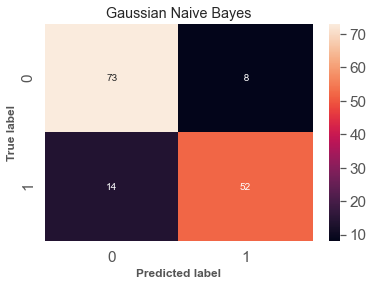

In [34]:
NB_cm = confusion_matrix(y_test, NB_pred)
sns.heatmap(NB_cm,annot=True,fmt='2.0f')
plt.title('Gaussian Naive Bayes')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')

In [35]:
KNN = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 3)  
KNN.fit(X_train, y_train)

KNN_pred = pd.DataFrame(KNN.predict(X_test))

print(metrics.classification_report(y_test, KNN_pred))   #K-NearestNeighbors

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        81
           1       0.93      0.77      0.84        66

    accuracy                           0.87       147
   macro avg       0.88      0.86      0.87       147
weighted avg       0.88      0.87      0.87       147



In [36]:
KNN_pred.value_counts()

0    92
1    55
dtype: int64

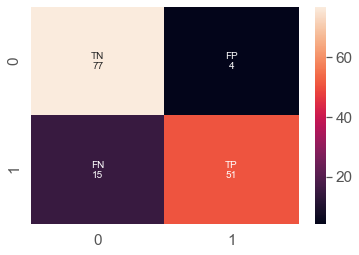

In [37]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                KNN_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(KNN_cm, annot=labels, fmt='')
plt.savefig('C:/Users/kayle/Desktop/KNN_confmatrix',dpi=300,bbox_inches='tight', transparent=True)

Text(0.5, 8.5, 'Predicted label')

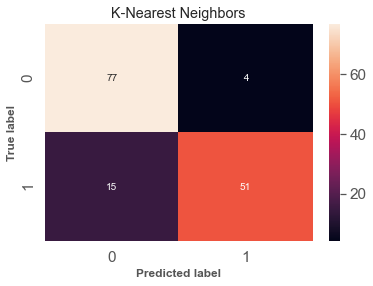

In [38]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm,annot=True,fmt='2.0f')
plt.title('K-Nearest Neighbors')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')

In [39]:
# define input
new_input = [[0.241233, 280.170902, 5.0]]        #Expected class No_fire
# get prediction for new input
new_output = KNN.predict(new_input)
# summarize input and output
print(new_input, new_output)

[[0.241233, 280.170902, 5.0]] [0]


In [40]:
data.loc[data['Class'] == 1]

,NDVI,LST,TA,Class
166,0.291647,310.050541,5.0,1
167,0.290621,306.882328,5.0,1
168,0.289594,312.864003,5.0,1
169,0.288568,312.966706,5.0,1
170,0.287541,308.390145,5.0,1
...,...,...,...,...
709,0.363744,286.348347,5.0,1
710,0.359783,285.296674,5.0,1
711,0.355822,284.720852,5.0,1
712,0.351861,287.851355,5.0,1


In [41]:
# define input
new_input2 = [[0.291647, 310.050541, 5.0]]       #Expected class Fire
# get prediction for new input
new_output2 = KNN.predict(new_input2)
# summarize input and output
print(new_input2, new_output2)

[[0.291647, 310.050541, 5.0]] [0]


# Random Forest

In [44]:
#Create a RandomForest Classifier
RF = RandomForestClassifier(n_estimators= 300)                      

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train)

RF_pred = RF.predict(X_test) 

print(metrics.classification_report(y_test, RF_pred))   #Random Forest

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        81
           1       0.84      0.80      0.82        66

    accuracy                           0.84       147
   macro avg       0.84      0.84      0.84       147
weighted avg       0.84      0.84      0.84       147



Text(0.5, 8.5, 'Predicted label')

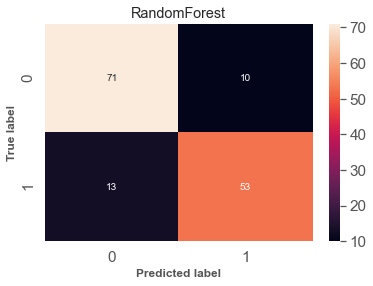

In [45]:
RF_cm = confusion_matrix(y_test, RF_pred)
sns.heatmap(RF_cm,annot=True,fmt='2.0f')
plt.title('RandomForest')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')

In [46]:
kfold = KFold(n_splits=10,random_state=5,shuffle=True)
RF_kFold = cross_val_score(estimator = RF, X = X_train,y = y_train, cv = kfold)
print("RF-Accuracy: %.3f%%" % (RF_kFold.mean()*100.0))

RF-Accuracy: 81.505%
